# 1. Import the Libraries

In [1783]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn import metrics



# 2. Import data

In [1784]:
file_path = 'WorldHappiness.xls'
data = pd.read_excel(file_path).dropna()

##### Asia

In [1785]:
asian_countries = ['Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan',
    'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia',
    'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait',
    'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia',
    'Myanmar (Burma)', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Philippines',
    'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka',
    'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Timor-Leste', 'Turkey',
    'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Yemen']

asian_countries_data = data[data['Country name'].isin(asian_countries)]
asian_countries_data

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.164055,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.187297,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.117861,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.160098,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.234157,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2319,Yemen,2013,4.217679,8.166425,0.693905,58.480000,0.542547,-0.178859,0.885197,0.478329,0.265685
2320,Yemen,2014,3.967958,8.159072,0.638252,58.439999,0.663909,-0.165578,0.885429,0.526577,0.275674
2321,Yemen,2015,2.982674,7.772318,0.668683,58.400002,0.609981,-0.138422,0.829098,0.458002,0.321357
2324,Yemen,2018,3.057514,7.443574,0.789422,57.724998,0.552726,-0.127163,0.792587,0.409410,0.314870


# 4. Linear Regression Analysis for Asian Countries
##### LL = β0 + β1⋅GDP + β2⋅SS + β3⋅HLE + β4⋅FL + β5⋅G + β6⋅PC + β7⋅PA + β8⋅NA + e
**Dependent variable and independent variables**

We will use `Life Ladder` as the dependent variable and the following as independent variables:
- Log GDP per capita
- Social support
- Healthy life expectancy at birth
- Freedom to make life choices
- Generosity
- Perceptions of corruption
- Positive affect
- Negative affect


In [1786]:
#Dependent variable and independent variables
dependent_var = 'Life Ladder'
independent_vars = ['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth', 
                    'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 
                    'Positive affect', 'Negative affect']


### 4.1 Preparing data for regression
We will prepare the data for the regression analysis by splitting it into training and testing sets.


In [1787]:
#Preparing data for regression
X_asia = asian_countries_data[independent_vars]
y_asia = asian_countries_data[dependent_var]

#Add a constant to the independent variables matrix to account for the intercept 
X_asia = sm.add_constant(X_asia)

## Create the train-test split
# Note the test_size=0.2. This means you will use 20% of the data in your test set.
X_train_asia, X_test_asia, y_train_asia, y_test_asia = train_test_split(
    X_asia, y_asia, test_size=0.2, random_state=42)

#Show how X_train and y_train look like
print(f"Independent(X) variables:")
print(X_train_asia.values)
print(f"Dependent (y) variable:")
print(y_train_asia)

Independent(X) variables:
[[1.         9.39700985 0.94151413 ... 0.84850222 0.52484387 0.1918903 ]
 [1.         8.58845806 0.55301416 ... 0.88939929 0.50403368 0.41736826]
 [1.         8.96194363 0.89550376 ... 0.66156167 0.69845933 0.23267213]
 ...
 [1.         8.60368633 0.59031618 ... 0.86501169 0.46902508 0.36751366]
 [1.         8.65753841 0.71236962 ... 0.68020386 0.56224656 0.33842701]
 [1.         9.1157465  0.54351306 ... 0.5345853  0.39125225 0.24235015]]
Dependent (y) variable:
1398    5.464623
1613    4.549314
2275    6.185308
908     5.472361
2310    5.462342
          ...   
724     4.348921
1181    5.031899
1612    4.930678
2018    5.323332
720     3.800639
Name: Life Ladder, Length: 408, dtype: float64



**Matrix Representation for \( x \) (Independent Variable)**

$$
X = \begin{bmatrix} 
1 & x_{11} & x_{12} & \dots & x_{1n} \\ 
1 & x_{21} & x_{22} & \dots & x_{2n} \\ 
\vdots & \vdots & \vdots & \ddots & \vdots \\ 
1 & x_{m1} & x_{m2} & \dots & x_{mn} 
\end{bmatrix} = \begin{bmatrix}
1 & 9.39700985 & 0.94151413 & \dots & 0.84850222 & 0.52484387 & 0.1918903 \\ 
1 & 8.58845806 & 0.55301416 & \dots & 0.88939929 & 0.50403368 & 0.41736826 \\ 
1 & 8.96194363 & 0.89550376 & \dots & 0.66156167 & 0.69845933 & 0.23267213 \\ 
\vdots & \vdots & \vdots & \ddots & \vdots & \vdots & \vdots \\ 
1 & 8.60368633 & 0.59031618 & \dots & 0.86501169 & 0.46902508 & 0.36751366 \\ 
1 & 8.65753841 & 0.71236962 & \dots & 0.68020386 & 0.56224656 & 0.33842701 \\ 
1 & 9.1157465 & 0.54351306 & \dots & 0.5345853 & 0.39125225 & 0.24235015 
\end{bmatrix}
$$


**Matrix Representation for \( y \) (Dependent Variable)**

$$
y = \begin{bmatrix} 
y_{1} \\ 
y_{2} \\ 
\vdots \\ 
y_{m} 
\end{bmatrix} = \begin{bmatrix}
5.464623 \\
4.549314 \\
6.185308 \\
5.472361 \\
5.462342 \\
\vdots \\
4.348921 \\
5.031899 \\
4.930678 \\
5.323332 \\
3.800639
\end{bmatrix}
$$



### 4.2 Train Linear Regression Model
We will use statsmodels to train the model


**Explanation of OLS Regression Model**

The `OLS()` function sets up an Ordinary Least Squares (OLS) regression model. In OLS regression, we aim to find the best-fitting line through the data points that minimizes the sum of the squared differences (residuals) between the observed values and the values predicted by the model.

Mathematically, the OLS regression model can be represented as:

$$
y = X\beta + e
$$

where:

- `y` is the vector of observed dependent variable values.
- `x` is the matrix of independent variable values, including a column of ones for the intercept.
- `Beta` is the vector of coefficients, including the intercept and the slopes for each independent variable.
- `e` is the vector of residuals (errors).

The goal is to estimate the vector of coefficients `beta` that minimizes the sum of squared residuals:

$$
\min_{\beta} \sum_{i=1}^n (y_i - X_i \beta)^2
$$

To find the optimal coefficients `beta`, we use the following formula:

$$
\beta = \begin{bmatrix} 
\beta_0 \\ 
\beta_1 \\ 
\beta_2 \\ 
\vdots \\ 
\beta_n 
\end{bmatrix}
= (X^T X)^{-1} X^T \begin{bmatrix} 
y_1 \\ 
y_2 \\ 
\vdots \\ 
y_m 
\end{bmatrix}
$$

By multiplying these matrices together, we obtain the estimated coefficients `beta`.



In [1788]:
#Training the linear regression model using statsmodels to obtain p-values
model_asia_sm = sm.OLS(y_train_asia, X_train_asia).fit()

In summary, the `OLS()` function sets up an Ordinary Least Squares regression model, and `fit()` computes the optimal coefficients to minimize the difference between observed and predicted values.

### 4.3 Display Coefficients and P-values

We will display the coefficients and p-values of the model.

------

**What are p-values?**

In linear regression, p-values help determine if the feature coefficients are statistically significant.

- **If p-value (< 0.05)**: Meaning the feature is significantly related to the dependent variable.
- **If p-value (≥ 0.05)**: Meaning the feature is likely not significantly related to the dependent variable.

----



Model Coefficients and P-values:
                                  Coefficient       P-value
const                               -1.153733  1.443818e-02
Log GDP per capita                   0.380913  7.680627e-11
Social support                       2.038298  8.728329e-10
Healthy life expectancy at birth     0.017467  6.901911e-02
Freedom to make life choices         0.294961  2.932695e-01
Generosity                           0.581058  7.615152e-04
Perceptions of corruption           -0.187944  3.201850e-01
Positive affect                      0.610858  8.981355e-02
Negative affect                     -1.230216  5.239912e-05


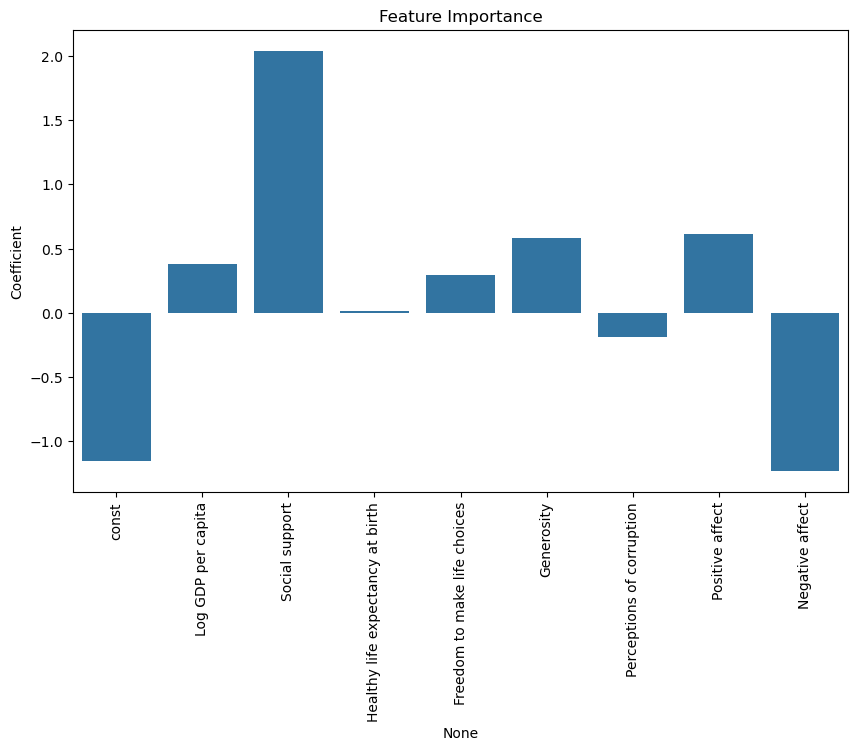

In [1789]:
coefficients_pvalues = pd.DataFrame({
    'Coefficient': model_asia_sm.params,
    'P-value': model_asia_sm.pvalues
})

print("\nModel Coefficients and P-values:")
print(coefficients_pvalues)

#Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients_pvalues.index, y='Coefficient', data=coefficients_pvalues)
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.show()

In [1791]:
#Prediction on the test set
y_test_preds_asia = model_asia_sm.predict(X_test_asia)

#Model evaluation on the test set
mse_test = mean_squared_error(y_test_asia, y_test_preds_asia)
r2_test = r2_score(y_test_asia, y_test_preds_asia)
print()
print(f'Mean Squared Error on Test Data (MSE): {mse_test:.2f}')
print(f'R-squared on Test Data (R²): {r2_test:.2f}')



Mean Squared Error on Test Data (MSE): 0.38
R-squared on Test Data (R²): 0.62


**Mean Squared Error (MSE):**

This indicates that, on average, the predicted happiness scores differ from the actual scores by 0.38 units. The lower this number, the better our model is at making accurate predictions.

**R-squared (R²):**

This means that 62% of the variation in happiness scores can be explained by the estimated model. An R² value of 0.62 indicates a strong relationship between the independent variables and the happiness scores.

### 4.5 Plots
We will compare the actual happiness scores with the predicted happiness scores. This plot helps visualize how well model's predictions align with the actual values. The closer the points are to the diagonal line, the better the model's predictions match the actual data. This helps us assess the accuracy of our model.

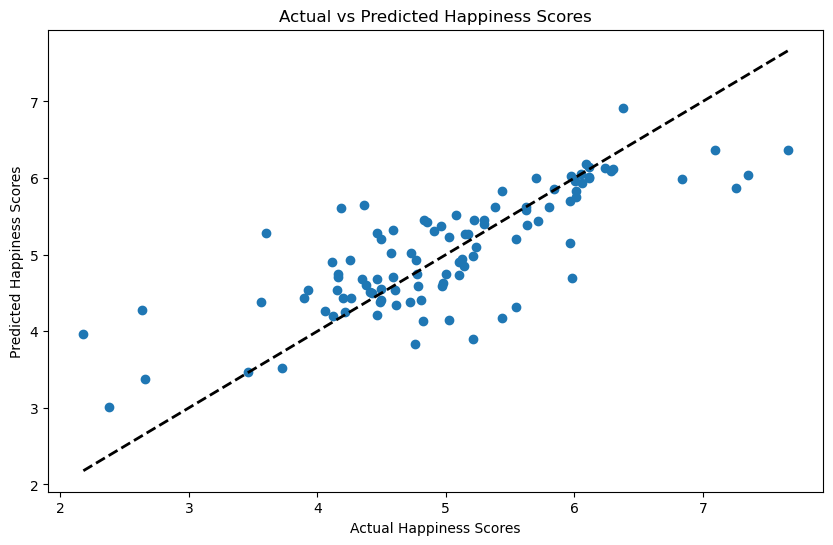

In [1792]:
#plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_asia, y_test_preds_asia)
plt.plot([y_test_asia.min(), y_test_asia.max()], [y_test_asia.min(), y_test_asia.max()], 'k--', lw=2)
plt.xlabel('Actual Happiness Scores')
plt.ylabel('Predicted Happiness Scores')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

The residuals show for how much our predictions differ from the actual values. And the graph helps us to see if there are any systematic errors or anomalies that the model did not take into account.

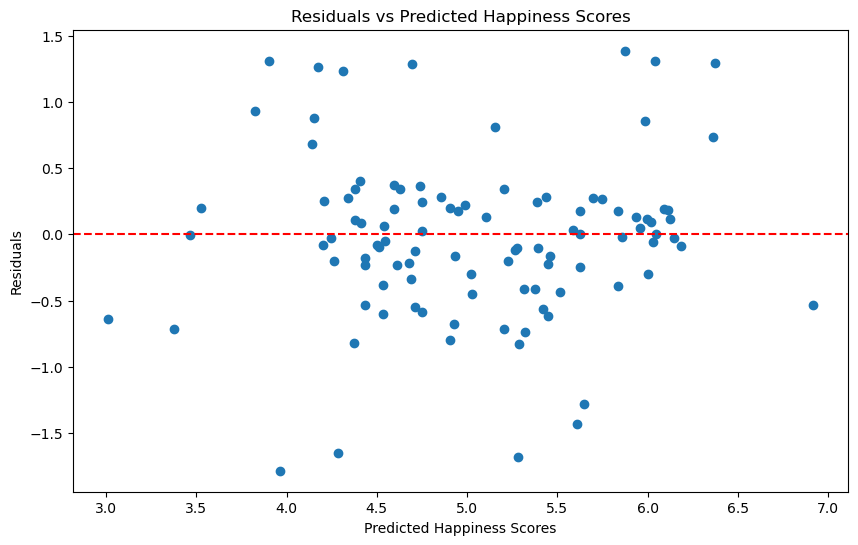

In [1793]:
#residuals
residuals = y_test_asia - y_test_preds_asia
#Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test_preds_asia, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Happiness Scores')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Happiness Scores')
plt.show()

- The distribution of the residuals looks mostly random, which is a good sign.

- The residues have a more or less constant variance, which is also a positive sign.


**Summary of Findings:**
- The scatter plot and residuals plot show that our model's predictions are pretty close to the actual happiness scores, and the random distribution of residuals suggests that the model fits well.


------

In [1794]:
# Print the summary of the model
print(model_asia_sm.summary())

                            OLS Regression Results                            
Dep. Variable:            Life Ladder   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     88.70
Date:                Mon, 17 Jun 2024   Prob (F-statistic):           1.04e-83
Time:                        10:32:30   Log-Likelihood:                -322.81
No. Observations:                 408   AIC:                             663.6
Df Residuals:                     399   BIC:                             699.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   